<a href="https://colab.research.google.com/github/michaelwnau/ai-academy-machine-learning-2023/blob/main/EMGMM_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Week 4 - Session 1 : EM & GMM

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# This code is released under the MIT license.
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style='whitegrid')
from matplotlib.patches import Ellipse
from sklearn.mixture import GaussianMixture

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()

    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)

    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))

def plot_gmm(gmm, X, label=True, ax=None):
    """ Draw a scatter plot for X associated with gmm result"""
    # gmm: initialized GMM model
    # X: loaded dataset

    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=15, alpha=0.5, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=15, alpha=0.5, zorder=2)
    ax.axis('equal')

    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

def plot_scatter(X):
    """ Draw a scatter plot for X """
    # X: loaded dataset

    plt.scatter(X[:, 0], X[:, 1], s=15, alpha=0.5, cmap='viridis')

### Question 1 >>
* Load and plot the data: "EMGMM_dataset.npy"
* What do you observe?

(100, 2)


<ipython-input-4-ce124a12b3e9>:48: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], s=15, alpha=0.5, cmap='viridis')


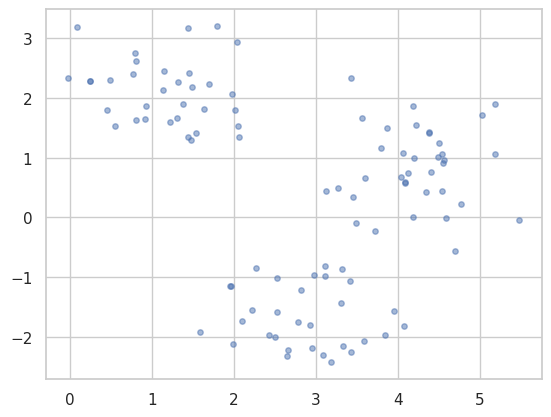

In [7]:
data = np.load("/content/drive/MyDrive/week-4/3_W4S1_Code_EMGMM/3_W4S1_Code_EMGMM/EMGMM_dataset.npy")
print(data.shape)
plot_scatter(data)

### Question 2 >>
* Change the parameters, compare the results
* Please refer to the parameters of GMM in this link:
https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html

<ipython-input-4-ce124a12b3e9>:24: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.add_patch(Ellipse(position, nsig * width, nsig * height,


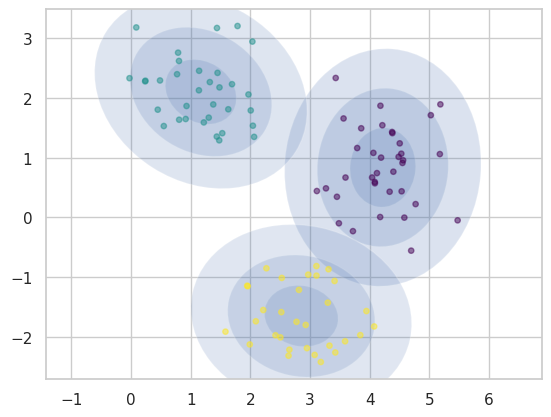

In [8]:
gmm = GaussianMixture(n_components=3,
                      covariance_type='full',
                      random_state=42,
                      init_params='random',
                      verbose=0)
plot_gmm(gmm, data)

### Question 3 >>
* Plot the GMM result with different number of iterations.
* Cahnge the iteration: 7 -> 15 -> 25

/usr/local/lib/python3.10/dist-packages/sklearn/mixture/_base.py:274: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(
<ipython-input-4-ce124a12b3e9>:24: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.add_patch(Ellipse(position, nsig * width, nsig * height,


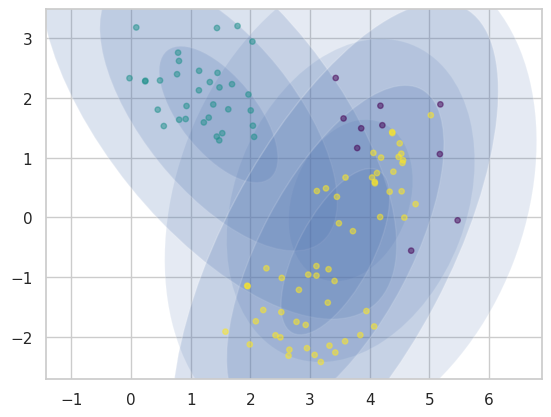

In [9]:
gmm = GaussianMixture(n_components=3,
                      covariance_type='full',
                      random_state=42,
                      init_params='random',
                      verbose=0,
                      max_iter=7)
plot_gmm(gmm, data)

### Question 4: Explore the MIMIC-III data
* Apply the methods to the imputed MIMIC-III data set with any two numerical features.
* What happens if the data for each cluster do not follow a Gaussian distribution?
* What happens if the data of two clusters are heavily overlapped?

<ipython-input-4-ce124a12b3e9>:48: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], s=15, alpha=0.5, cmap='viridis')


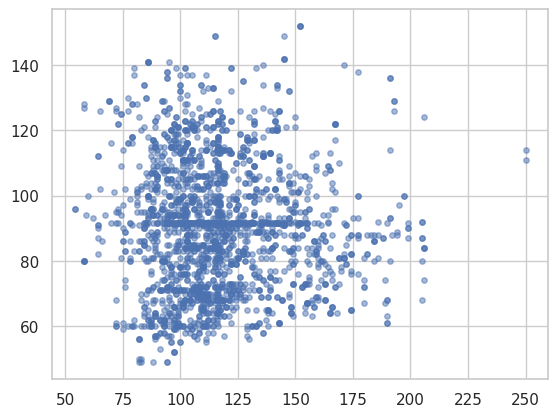

In [12]:
import pandas as pd
shock = pd.read_csv("/content/drive/MyDrive/week-4/3_W4S1_Code_EMGMM/3_W4S1_Code_EMGMM/mimic/mimic_shock.csv", header=0)
nonshock = pd.read_csv("/content/drive/MyDrive/week-4/3_W4S1_Code_EMGMM/3_W4S1_Code_EMGMM/mimic/mimic_nonshock.csv", header=0)
feat = ['SystolicBP','HeartRate']

shockVids = shock.VisitIdentifier.unique().tolist()[:100]
nonshockVids = nonshock.VisitIdentifier.unique().tolist()[:100]

shockSelected = shock.loc[shock.VisitIdentifier.isin(shockVids), feat]
nonshockSelected = nonshock.loc[nonshock.VisitIdentifier.isin(nonshockVids),feat]

shock_data = shockSelected.values
nonshock_data = nonshockSelected.values
mimic_data = np.concatenate([shock_data, nonshock_data])

plot_scatter(mimic_data)

<ipython-input-4-ce124a12b3e9>:48: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], s=15, alpha=0.5, cmap='viridis')


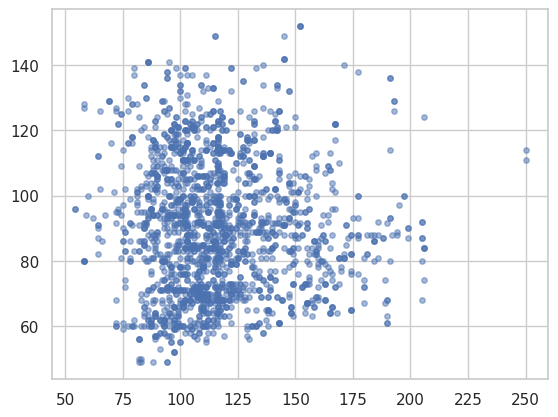

In [13]:
plot_scatter(shock_data)

<ipython-input-4-ce124a12b3e9>:48: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], s=15, alpha=0.5, cmap='viridis')


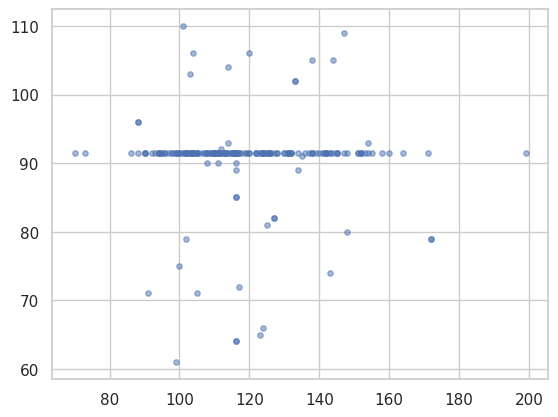

In [14]:
plot_scatter(nonshock_data)

* GMM result


<ipython-input-4-ce124a12b3e9>:24: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.add_patch(Ellipse(position, nsig * width, nsig * height,


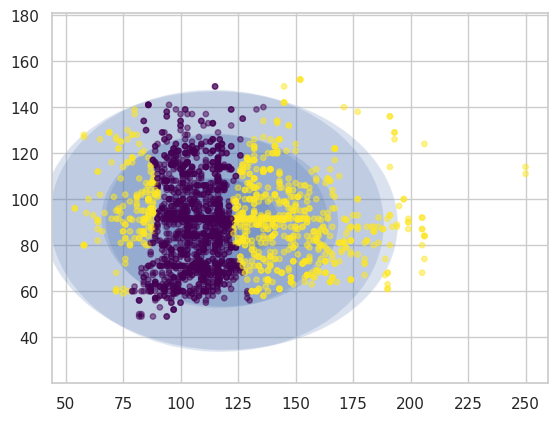

In [15]:
# GMM
gmm = GaussianMixture(n_components=2,
                      n_init = 1,  # default number of init = 1
                      covariance_type='full',
                      random_state=2,
                      init_params='random',
                      verbose=0)

print("* GMM result")
plot_gmm(gmm, mimic_data)

### Question 5: You may play with your own data or another dataset you generate.
* You may artificially gerenate data as follows:

<ipython-input-4-ce124a12b3e9>:48: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], s=15, alpha=0.5, cmap='viridis')


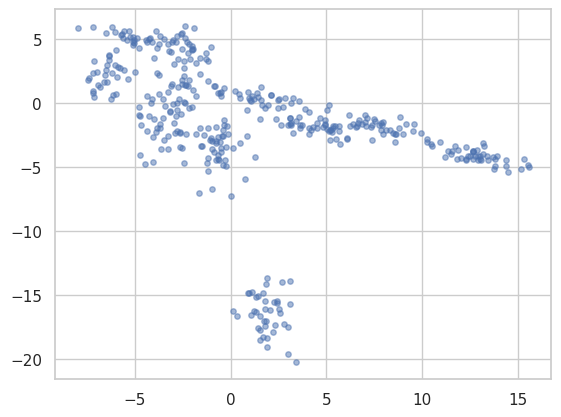

In [16]:
from sklearn.datasets import make_blobs   # scikit-learn version = 1.0.2
# if you fail to import the above, try this older version.
#from sklearn.datasets.samples_generator import make_blobs

X, y_true = make_blobs(n_samples=400, centers=5,
                       cluster_std=0.9, random_state=0)
X = X[:, ::-1] # flip axes for better plotting
rng = np.random.RandomState(7)
X1 = np.dot(X[:200], rng.randn(2, 2))  # make the first half of data skewed with random vectors
X2 = np.dot(X[200:], rng.randn(2, 2)) # make the second half of data skewed with random vectors
new_data = np.concatenate([X1, X2])
plot_scatter(new_data)

* GMM result


<ipython-input-4-ce124a12b3e9>:24: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.add_patch(Ellipse(position, nsig * width, nsig * height,


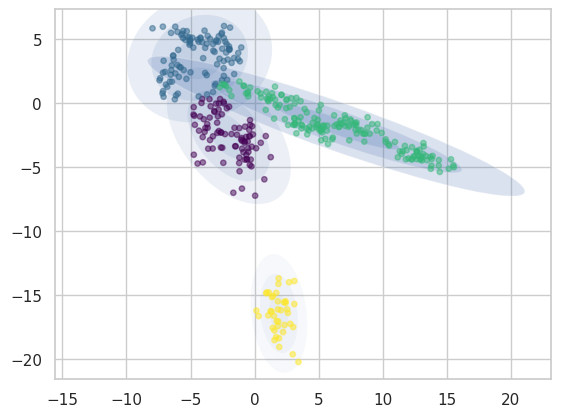

In [17]:
# GMM Clustering
gmm = GaussianMixture(n_components=4,
                      n_init = 10,  # default number of init = 1
                      covariance_type='full',
                      random_state=2,
                      init_params='random',
                      verbose=0)

print("* GMM result")
plot_gmm(gmm, new_data)